### import all packages

In [1]:
import pandas as pd
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
## used for plot interactive graph.
import matplotlib.pyplot as plt
#import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#

## Data Preparation
### - import train, test, valid data


In [2]:
train = pd.read_json ('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/ccpc_train_v1.0.json', lines=True)
train.head()

,dynasty,author,content,title,keywords
0,Ming,翁万达,崖悬百尺古|面削一屏开|晴日流丹草|春风长绿苔,锦屏岩,屏开 晴日 春风 绿苔
1,Ming,童冀,每忆宋夫子|终年坐北轩|著书良自苦|得意好忘言,次胡仲申先生斋居述怀韵十首兼简宋景濂先生 其八,著书 终年 好 忘言
2,Ming,管讷,劝酒重持杯|杯深喜不辞|愿将今日意|同保百年期,初度日复呈兄勉翁三首 其二,劝酒 杯深 持杯 愿将
3,Song,汪应辰,仁心均动植|风化正邦家|福庆方骈集|灵符尚辟邪,太上皇后合端午帖子词 其二,均 风化 灵符 邦家
4,Song,蒲寿宬,骤来惊辟易|久视益虚无|咫尺星堪摘|波摇又走珠,心泉二首 其二,波摇 星 辟易 咫尺


In [3]:
test = pd.read_json ('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/ccpc_test_v1.0.json', lines=True)
test.head()

,dynasty,author,content,title,keywords
0,Song,赵戣,猛上临光殿|生擒归命侯|师心无学术|与子失贻谋,咏史二十二首 其十六 隋文帝,贻谋 学术 侯 失
1,Song,张栻,送子目力短|朔风吹我裾|心焉独如结|子也当念予,别离情所钟十二章章四句送定叟弟之官严陵 其十二,短 吹我 朔风 送子
2,Ming,何景明,泽国登楼处|江船见月时|回书寄来使|多是客中诗,席上分得时字送豫斋二首 其一,见月 客中 泽国 登楼
3,Yuan,范梈,芙蓉生石壁|云锦映青松|那忆南州路|归船处处逢,芙蓉,云锦 南州 青松 芙蓉
4,Ming,区大相,叱起群龙驭|天鸡闻远空|东溟一杯水|洗出金轮红,羊城八景 其八 扶桑浴日,远空 东溟 金轮 洗出


In [4]:
valid = pd.read_json ('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/ccpc_valid_v1.0.json', lines=True)
valid.head()

,dynasty,author,content,title,keywords
0,Song,苏辙,林高日气薄|竹色净如水|寂历断人声|时有鸣禽起,和文与可洋州园亭三十咏 其十四 霜筠亭,竹色 人声 寂历 鸣禽
1,Song,许应龙,清净无他好|歌风舞舜琴|阜财并解愠|总是爱民心,皇帝合端午帖子 其三,解愠 民心 爱 清净
2,Ming,梁养正,雨过山色增|有如濯青泚|仙心足比洁|俗尘为我洗,题县八景 其五 贞山两霁,俗尘 洗 雨过 山色
3,Song,郑国辅,满耳环佩声|云根线寒玉|雨过勿雷吼|老龙鼾正熟,云根石 其二,云根 环佩 雨过 寒玉
4,Ming,胡应麟,左淬莫耶锋|右淬干将锷|宇宙两神龙|延津当昼跃,再送左辖吴公十绝句 其八,神龙 宇宙 延津 干将


### - understand the data ration

In [11]:
print(len(train))
print(len(test))
print(len(valid))

127682
9976
7979


### - Concatenate train, test, valid data together

In [12]:
train = pd.concat([train, test, valid])

In [13]:
print(len(train))

145637


In [14]:
train['dynasty'].value_counts()

Song      66540
Ming      55952
Tang      10596
Yuan      10477
Jin        1718
tang        191
Sui          99
song         41
ming          6
qing          6
NanBei        4
Liao          4
yuan          3
Name: dynasty, dtype: int64

### - Define key characters for each class

In [15]:
#haofang : 1; wanyue : 2; shanshui :3; others: 0
haofang = ['苏轼','辛弃疾','张元干','张孝祥','岳飞','王安石','苏辙','陈与义','陆游','李纲','叶梦得',
           '陈亮','刘克庄','黄机','戴复古']
wanyue = ['柳永','晏殊','周邦彦','李清照','张先','晏几道','欧阳修','秦观','贺铸','温庭筠','李煜','韦庄','冯延巳']
shanshui = ['王维','孟浩然','卢纶','李益','陶渊明','王维','储光羲','裴迪','丘为','常建','杨万里','范成大']

### - add labels for each poem with class

In [16]:
train['cate']=['']*train.shape[0]
for i, row in train.iterrows():
    author = row['author']
    if author in haofang:
        classno = "豪放"
    elif author in wanyue:
        classno = '婉约'
    elif author in shanshui:
        classno = '山水'
    else:
        classno = 'To be predicted'
    train.loc[i,'cate'] = classno

### - calculate the number of poem labeled for each class

In [17]:
train['cate'].value_counts()


To be predicted    135833
豪放                   6059
山水                   3070
婉约                    675
Name: cate, dtype: int64

### - separate data into data with label and data without label

In [18]:
df_noclass = train.loc[train['cate'] == 'To be predicted']
l=['豪放','婉约','山水']
df_withclass = train.loc[train['cate'].isin(l)]

In [19]:
df_noclass.head()

,dynasty,author,content,title,keywords,cate
1,Ming,童冀,每忆宋夫子|终年坐北轩|著书良自苦|得意好忘言,次胡仲申先生斋居述怀韵十首兼简宋景濂先生 其八,著书 终年 好 忘言,To be predicted
2,Ming,管讷,劝酒重持杯|杯深喜不辞|愿将今日意|同保百年期,初度日复呈兄勉翁三首 其二,劝酒 杯深 持杯 愿将,To be predicted
3,Song,汪应辰,仁心均动植|风化正邦家|福庆方骈集|灵符尚辟邪,太上皇后合端午帖子词 其二,均 风化 灵符 邦家,To be predicted
4,Song,蒲寿宬,骤来惊辟易|久视益虚无|咫尺星堪摘|波摇又走珠,心泉二首 其二,波摇 星 辟易 咫尺,To be predicted
5,Song,袁说友,红妆夸睡足|粉额趁颜开|惟有江梅样|蛾眉淡拂来,用杨诚斋韵再题欧阳长老墨梅 其一,红妆 江梅 蛾眉 睡足,To be predicted


### -  add category_id for data with labels

In [20]:
df_withclass['category_id'] = df_withclass['cate'].factorize()[0]
category_id_df = df_withclass[['cate', 'category_id']].drop_duplicates()

/tmp/ipykernel_1892932/3497348243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_withclass['category_id'] = df_withclass['cate'].factorize()[0]


In [21]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'cate']].values)
# New dataframe
df_withclass.head()

,dynasty,author,content,title,keywords,cate,category_id
0,Ming,翁万达,崖悬百尺古|面削一屏开|晴日流丹草|春风长绿苔,锦屏岩,屏开 晴日 春风 绿苔,豪放,0
32,Ming,徐熥,夜月乌衣巷|秋风燕子矶|山川仍似昔|只是旧人非,芋江驿楼口占送王元直重游金陵 其二,秋风 山川 夜月 燕子,豪放,0
48,Ming,黄淮,见雁忆故乡|闻蛩思织妇|笑语是谁家|声逐微风度,四时词 其三,风度 笑语 谁家 微,山水,1
65,Song,刘克庄,曼卿仙不死|隐隐素骡嘶|走入芙蓉里|花心路忽迷,记小圃花果二十首 其十三 芙蓉,花心 仙 隐隐 芙蓉,豪放,0
93,Yuan,李孝光,采莲复采莲|莲生隔江水|不愁无舟楫|但愁波浪起,采莲曲二首为 鲁子翚作 其一,江水 波浪 舟楫 采莲,豪放,0


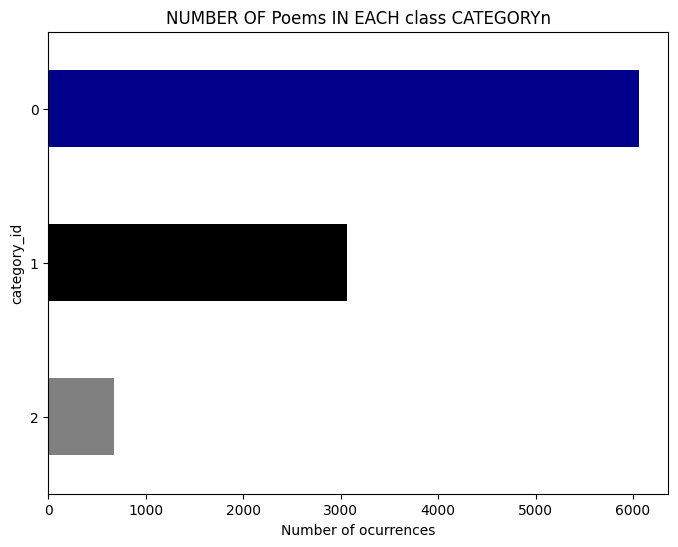

In [22]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','black','darkblue']
df_withclass.groupby('category_id').content.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF Poems IN EACH class CATEGORYn')
plt.xlabel('Number of ocurrences', fontsize = 10);

### - tokenize poem data

In [23]:
from LAC import LAC

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
lac = LAC(mode='lac')
corpus1 = []
 
for text in df_withclass['content'] :
     line = text.strip()
     lac_result = lac.run(line)
     corpus1.append(' '.join(lac_result[0]))
print(corpus1[:5])

W0409 19:53:04.188855 1892932 analysis_predictor.cc:1736] Deprecated. Please use CreatePredictor instead.


['崖 悬百尺古 | 面 削 一屏 开 | 晴日 流丹草 | 春风 长 绿苔', '夜月乌衣巷|秋风燕子矶 | 山川 仍 似昔 | 只是 旧人非', '见 雁忆故乡|闻蛩思织妇|笑语是谁家|声逐微风度', '曼卿仙 不死 | 隐隐 素骡嘶 | 走入 芙蓉 里 | 花心 路 忽 迷', '采莲复采莲|莲生隔江水 | 不愁 无 舟楫 | 但 愁 波浪 起']


In [25]:
df_withclass['new_content']=['']*df_withclass.shape[0]

/tmp/ipykernel_1892932/3743283712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_withclass['new_content']=['']*df_withclass.shape[0]


In [26]:
df_withclass['new_content']= corpus1

/tmp/ipykernel_1892932/1993609744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_withclass['new_content']= corpus1


In [27]:
df_withclass

,dynasty,author,content,title,keywords,cate,category_id,new_content
0,Ming,翁万达,崖悬百尺古|面削一屏开|晴日流丹草|春风长绿苔,锦屏岩,屏开 晴日 春风 绿苔,豪放,0,崖 悬百尺古 | 面 削 一屏 开 | 晴日 流丹草 | 春风 长 绿苔
32,Ming,徐熥,夜月乌衣巷|秋风燕子矶|山川仍似昔|只是旧人非,芋江驿楼口占送王元直重游金陵 其二,秋风 山川 夜月 燕子,豪放,0,夜月乌衣巷|秋风燕子矶 | 山川 仍 似昔 | 只是 旧人非
48,Ming,黄淮,见雁忆故乡|闻蛩思织妇|笑语是谁家|声逐微风度,四时词 其三,风度 笑语 谁家 微,山水,1,见 雁忆故乡|闻蛩思织妇|笑语是谁家|声逐微风度
65,Song,刘克庄,曼卿仙不死|隐隐素骡嘶|走入芙蓉里|花心路忽迷,记小圃花果二十首 其十三 芙蓉,花心 仙 隐隐 芙蓉,豪放,0,曼卿仙 不死 | 隐隐 素骡嘶 | 走入 芙蓉 里 | 花心 路 忽 迷
93,Yuan,李孝光,采莲复采莲|莲生隔江水|不愁无舟楫|但愁波浪起,采莲曲二首为 鲁子翚作 其一,江水 波浪 舟楫 采莲,豪放,0,采莲复采莲|莲生隔江水 | 不愁 无 舟楫 | 但 愁 波浪 起
...,...,...,...,...,...,...,...,...
7918,Song,杨万里,掠削娇云放嫩晴|三朝五日即清明|垂杨幸自风流杀|莫著啼乌只著莺,春望二首 其二,垂杨 放 风流 清明,山水,1,掠 削 娇云 放 嫩晴 | 三朝五日 即清明 | 垂 杨幸 自风流杀 | 莫著啼乌 只 著 莺
7923,Song,李纲,烟雨濛濛半暑时|轻红旋摘自提携|不知谁是善知识|断送归家食荔枝,初食荔枝四绝句 其一,提携 烟雨 荔枝 断送,豪放,0,烟雨 濛濛 半暑 时 | 轻红旋 摘自 提携 | 不知 谁 是 善 知识 | 断送 归家 食 荔枝
7945,Song,范成大,村北村南打稻声|竹舆随处款柴荆|斜阳倒景天如醉|明日山行更好晴,上沙舍舟,柴荆 明日 山行 斜阳,山水,1,村 北村 南 打稻 声 | 竹舆 随处 款 柴荆 | 斜阳 倒 景天如醉 | 明日 山行 更好 晴
7946,Song,刘克庄,逐客挑包水榭中|忽闻乾鹊噪东风|若非闽峤安书至|即是襄州吉语通,出宿环碧,水榭 安 东风 逐客,豪放,0,逐 客挑包 水榭 中 | 忽 闻 乾鹊 噪 东风 | 若 非闽峤安书 至 | 即 是 襄州吉语通


### - find features for each poem

In [29]:
stopwords = ['|']
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2,
                        ngram_range=(1, 2), 
                        stop_words=stopwords)

features = tfidf.fit_transform(df_withclass.new_content).toarray()
labels = df_withclass.category_id
print("Each of the %d poem is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 9804 poem is represented by 18327 features (TF-IDF score of unigrams and bigrams)


In [35]:
sorted(category_to_id.items())

[('婉约', 2), ('山水', 1), ('豪放', 0)]

In [30]:
# Finding the most correlated terms with each of the product categories
N = 1
for cate, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("n==> %s:" %(cate))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

/media/ntu/volume1/home/s122md303_03/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> 婉约:
  * Most Correlated Unigrams are: 圣君
  * Most Correlated Bigrams are: 殷勤 故人


/media/ntu/volume1/home/s122md303_03/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> 山水:
  * Most Correlated Unigrams are: 忽然
  * Most Correlated Bigrams are: 不管 人间
n==> 豪放:
  * Most Correlated Unigrams are: 忽然
  * Most Correlated Bigrams are: 不管 人间


/media/ntu/volume1/home/s122md303_03/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
X = df_withclass['new_content'] # Collection of documents
y = df_withclass['cate'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)


### - initialize models for classification

In [36]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5,criterion="entropy", random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [37]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/media/ntu/volume1/home/s122md303_03/.local/lib/python3.8/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/media/ntu/volume1/home/s122md303_03/.local/lib/python3.8/site-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/media/ntu/volume1/home/s122md303_03/.local/lib/python3.8/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/media/ntu/volume1/home/s122md303_03/.local/lib/python3.8/site-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/media/ntu/volume1/home/s122md303_03/.local/lib/python3.8/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use to

In [39]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

In [43]:
acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.81267,0.041415
LogisticRegression,0.76135,0.022902
MultinomialNB,0.78973,0.026898
RandomForestClassifier,0.75208,0.000087


In [44]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df_withclass.index, test_size=0.05, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [49]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        #stop_words='english'
                        )

### - select linearSVC as it has highest accuracy

In [50]:
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

### - try 1 poem data

In [51]:
poem = """枫叶丹红百万姿 逢秋自有几番痴 桂香黄菊难留住 待到来年再绿时"""
print(model.predict(fitted_vectorizer.transform([poem])))

['豪放']


In [52]:
df_noclass1 = df_noclass.copy()

### - use trained model to predict on data without label

In [53]:
df_noclass1['new_content']=['']*df_noclass1.shape[0]
df_noclass1['prediction']=['']*df_noclass1.shape[0]
for i,row in df_noclass1.iterrows():
    line = row['content'].strip()
    lac_result = lac.run(line)
    df_noclass1.loc[i,'new_content']= " ".join(lac_result[0])
    df_noclass1.loc[i,'prediction']= model.predict(fitted_vectorizer.transform([row['new_content']]))
    

In [54]:
print(len(df_noclass1))

135833


In [45]:
df_noclass1.head()

,dynasty,author,content,title,keywords,cate,new_content,prediction
1,Ming,童冀,每忆宋夫子|终年坐北轩|著书良自苦|得意好忘言,次胡仲申先生斋居述怀韵十首兼简宋景濂先生 其八,著书 终年 好 忘言,,清净 无 他 好 | 歌风 舞舜琴 | 阜财 并 解愠 | 总是 爱民 心,山水
2,Ming,管讷,劝酒重持杯|杯深喜不辞|愿将今日意|同保百年期,初度日复呈兄勉翁三首 其二,劝酒 杯深 持杯 愿将,,雨过山色增 | 有如濯青泚|仙心足比洁|俗尘 为 我 洗,豪放
3,Song,汪应辰,仁心均动植|风化正邦家|福庆方骈集|灵符尚辟邪,太上皇后合端午帖子词 其二,均 风化 灵符 邦家,,满耳环 佩声 | 云根 线 寒玉 | 雨 过勿 雷吼 | 老龙 鼾 正 熟,豪放
4,Song,蒲寿宬,骤来惊辟易|久视益虚无|咫尺星堪摘|波摇又走珠,心泉二首 其二,波摇 星 辟易 咫尺,,左淬莫耶锋 | 右淬干将锷|宇宙两神龙|延津 当 昼跃,豪放
5,Song,袁说友,红妆夸睡足|粉额趁颜开|惟有江梅样|蛾眉淡拂来,用杨诚斋韵再题欧阳长老墨梅 其一,红妆 江梅 蛾眉 睡足,,嵯峨 插天峰 | 偃蹇据地松 | 峰 那 不 出雨 | 松 已 欲 成龙,豪放


In [53]:
hf_predicted = df_noclass1.loc[(df_noclass1['prediction'] == "豪放") | (df_noclass1['prediction'] == "[豪放]")][['dynasty', 'author', 'content','title','keywords']].copy()
ss_predicted = df_noclass1.loc[(df_noclass1['prediction'] == "山水") | (df_noclass1['prediction'] == "[山水]")][['dynasty', 'author', 'content','title','keywords']].copy()
wy_predicted = df_noclass1.loc[(df_noclass1['prediction'] == "婉约") | (df_noclass1['prediction'] == "[婉约]")][['dynasty', 'author', 'content','title','keywords']].copy()

In [57]:
hf_labeled = df_withclass.loc[(df_withclass['cate'] == "豪放") ][['dynasty', 'author', 'content','title','keywords']].copy()
ss_labeled = df_withclass.loc[(df_withclass['cate'] == "山水") ][['dynasty', 'author', 'content','title','keywords']].copy()
wy_labeled = df_withclass.loc[(df_withclass['cate'] == "婉约") ][['dynasty', 'author', 'content','title','keywords']].copy()

In [58]:
print(len(hf_predicted))
print(len(ss_predicted))
print(len(wy_predicted))

96830
20026
2208


In [59]:
print(len(hf_labeled))
print(len(ss_labeled))
print(len(wy_labeled))

5299
2724
595


In [62]:
hf = pd.concat([hf_labeled,hf_predicted])
ss = pd.concat([ss_labeled,ss_predicted])
wy = pd.concat([wy_labeled,wy_predicted])

In [63]:
print(len(hf))
print(len(ss))
print(len(wy))

102129
22750
2803


In [68]:
hf_train = hf[:-2000]
hf_test = hf[-2000:-1000]
hf_valid = hf[-1000:]

ss_train = ss[:-200]
ss_test = ss[-200:-100]
ss_valid = ss[-100:]

wy_train = wy[:-100]
wy_test = wy[-100:-50]
wy_valid = wy[-50:]

In [69]:
hf_train.to_json('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/hf_train.json',orient = 'records',force_ascii=False,lines = True)
hf_valid.to_json('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/hf_valid.json',orient = 'records',force_ascii=False,lines = True)
hf_test.to_json('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/hf_test.json',orient = 'records',force_ascii=False,lines = True)


In [70]:
ss_train.to_json('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/ss_train.json',orient = 'records',force_ascii=False,lines = True)
ss_valid.to_json('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/ss_valid.json',orient = 'records',force_ascii=False,lines = True)
ss_test.to_json('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/ss_test.json',orient = 'records',force_ascii=False,lines = True)

wy_train.to_json('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/wy_train.json',orient = 'records',force_ascii=False,lines = True)
wy_valid.to_json('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/wy_valid.json',orient = 'records',force_ascii=False,lines = True)
wy_test.to_json('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/wy_test.json',orient = 'records',force_ascii=False,lines = True)

In [71]:
hf.to_csv('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/hf.csv')
ss.to_csv('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/ss.csv')
wy.to_csv('/media/ntu/volume1/home/s122md303_03/Datasets/CCPC/wy.csv')